### 1

In [3]:
import matplotlib.pyplot as plt

In [2]:
# --- Load data ---
from keras.datasets import fashion_mnist

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 17s 4us/step


In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
from keras.datasets import fashion_mnist
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [13]:
# --- Checking size of MNIST Set ---
print("The number of training examples: "+str(X_train.shape))
print("The number of test examples: "+str(X_test.shape))

The number of training examples: (60000, 28, 28)
The number of test examples: (10000, 28, 28)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.3170 - val_loss: 0.3122
Epoch 2/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.3114 - val_loss: 0.3109
Epoch 3/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.3070 - val_loss: 0.3079
Epoch 4/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3038 - val_loss: 0.3042
Epoch 5/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.3018 - val_loss: 0.3003
Epoch 6/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3002 - val_loss: 0.3012
Epoch 7/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.2987 - val_loss: 0.2982
Epoch 8/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.2973 - val_loss: 0.3009
Epoch 9/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.2960 - val_loss: 0.2

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

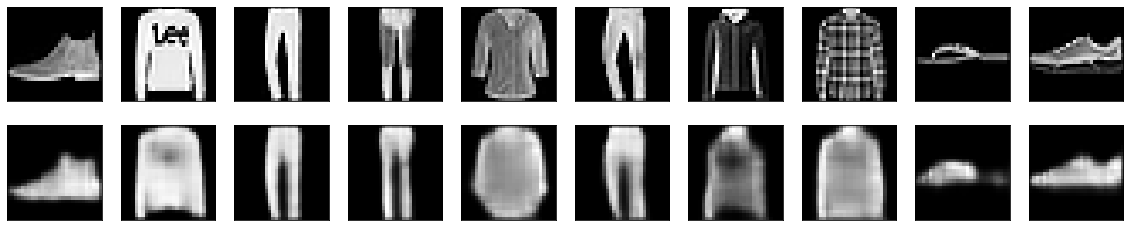

In [12]:
#autoencoder.save('Antoencoder.h5')

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### 2

In [16]:
# ======================
#  Importing Librarires
# ======================
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(123) 

In [5]:
# ===========================================
#  Importing model and core layers in Keras
# ==========================================
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential

# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten

# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D

# Tools for data transformation
from keras.utils import np_utils

In [6]:
 # Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# ========================
#  Data Munging/Reshaping
# ========================
# Declaring a depth of 1 for MNIST
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(X_train.shape)
print(X_test.shape)

(60000,)
[9 0 0 3 0 2 7 2 5 5]
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
# =============================
#  Setting up the Architecture
# ============================
# Declaring sequential model
model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
# Notice here the the first entry output is none
print(model.output_shape)

# Next we add the remaining layers
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Setting up the fully connected layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 26, 26, 32)
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                294976    
__________________________________________________

In [49]:
# =========================================
# Multigpu support Function Make-Parallel
# ========================================
# MultiGPU hack: 
# https://github.com/rossumai/keras-multi-gpu/tree/master/keras_tf_multigpu

# =====================
#  Compiling the model
# =====================
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# ===================
# Fitting the model
# ===================
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=128,
         verbose = 1)
# =====================
#  Evaluating the model
# =====================
score = model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.6193 - acc: 0.7827
Epoch 2/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.4119 - acc: 0.8535
Epoch 3/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.3653 - acc: 0.8700
Epoch 4/10
60000/60000 [==============================] - 439s 7ms/step - loss: 0.3343 - acc: 0.8801
Epoch 5/10
60000/60000 [==============================] - 393s 7ms/step - loss: 0.3115 - acc: 0.8888
Epoch 6/10
60000/60000 [==============================] - 306s 5ms/step - loss: 0.2951 - acc: 0.8935
Epoch 7/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.2758 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2634 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2526 - acc: 0.9088
Epoch 10/10
10000/10000 [==============================] - 10s 994us/step


In [50]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23228861196041106
Test accuracy: 0.9152


In [11]:
predicted_values = model.predict_classes(X_test[0:2**9],batch_size=32, verbose=1)
pd.crosstab(predicted_values, y_test[0:2**9],
            rownames=['Predicted Value'], colnames= ['True Value'] )

512/512 [==============================] - 1s 1ms/step


True Value,0,1,2,3,4,5,6,7,8,9
Predicted Value,,,,,,,,,,
0,52,0,1,2,0,0,1,0,0,0
1,0,53,0,0,0,0,0,0,0,0
2,0,0,63,0,2,0,3,0,0,0
3,0,0,0,43,4,0,2,0,0,0
4,0,0,1,1,50,0,2,0,0,0
5,0,0,0,0,0,40,0,1,0,1
6,4,0,6,0,2,0,39,0,0,0
7,0,0,0,0,0,0,0,47,0,3
8,0,0,0,0,0,0,0,0,45,0


This network contains 2 convolution layers(ReLu activation function) each with 32 filters of 3 by 3, stride of 1 by 1.
The network also contains two dense layers with 64 and 10 neurons respectively. The last layer employed softmax function as the activation function.

The model is trained for 10 epochs. The size ratio of training set and test set is 6:1 and its test accuracy is aboout 91.52%.



### 2.2

In [7]:
from keras.applications import VGG16, VGG19, ResNet50
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

In [23]:
conv_base = VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [24]:
X_train2 = X_train
X_test2 = X_test
X_train2 = np.c_[X_train,X_train,X_train]
X_test2 = np.c_[X_test, X_test,X_test]
X_train2 = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((48,48))) for im in X_train2])
X_test2 = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((48,48))) for im in X_test2])

In [30]:
###########################
# Coparing to a base model
###########################
# How does our CNN compare to a dense network?
# Declaring sequential model

conv_base = VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_dense = Sequential()
model_dense.add(conv_base)
model_dense.add(Flatten())
model_dense.add(Dense(128, activation = "relu"))
model_dense.add(Dropout(0.5))
model_dense.add(Dense(10, activation='softmax'))
print(model_dense.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 20,091,338
Trainable params: 20,091,338
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
X_train2.shape, X_test2.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [32]:
conv_base.trainable = False
model_dense.trainable_weights

[<tf.Variable 'dense_7/kernel:0' shape=(512, 128) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_8/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_8/bias:0' shape=(10,) dtype=float32_ref>]

In [33]:
#  Compiling the model
model_dense.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Fitting the model
model_dense.fit(X_train2, Y_train,epochs=3,batch_size=128,verbose = 1)


Epoch 1/3
 4864/60000 [=>............................] - ETA: 4:15:51 - loss: 14.5706 - acc: 0.0960

In [36]:
#  Evaluating the model
score_dense = model_dense.evaluate(X_test2, Y_test, verbose=1)

10000/10000 [==============================] - 889s 89ms/step


In [37]:
print('Test loss:', score_dense[0])
print('Test accuracy:', score_dense[1])

Test loss: 14.506285668945312
Test accuracy: 0.1


We use pretrained VGG19 network with 2 dense layers in this model, we reshape the dataset into 48*48 as this pretrained model required a minimum size of 48*48. The training process for dense CNN takes lots of time and effort. If the GPU has better performance, I could increase the epoches and the model accuracy can be improved.



### 3.1 RNN

In [32]:
benigh = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
malicious = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt')

In [35]:
benigh.head(5)

,# GOOGLE
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [37]:
benigh.columns = ['url']
benigh.head(5)

,url
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [36]:
malicious.head(5)

,0
0,.1337x.pl
1,.1link.io
2,.1n.pm
3,.22apple.com
4,.22find.com


In [38]:
malicious.columns = ['url']
malicious.head(5)

,url
0,.1337x.pl
1,.1link.io
2,.1n.pm
3,.22apple.com
4,.22find.com


In [42]:
print(len(malicious))
print(len(benigh))

1296
66056


In [39]:
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.models import Sequential
import numpy as np

In [65]:
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional, SimpleRNN
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split

In [62]:
benigh['class'] = 1
malicious['class'] = 0
np.random.seed(0)

In [53]:
df = pd.concat([benigh, malicious], ignore_index = True).reset_index()
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(df['url'])

X_train = tokenizer.texts_to_sequences(df['url'])
y_train = df['class']
#y_train = np_utils.to_categorical(df['class'], 2)

max_features = 1000
maxlen = df['url'].str.len().max()

In [56]:
input_train, input_test, y_train, y_test  = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [57]:
input_train = sequence.pad_sequences(input_train, maxlen)
input_test = sequence.pad_sequences(input_test, maxlen)

In [58]:
input_train.shape

(47146, 86)

In [59]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 64))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))

In [60]:
rnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [78]:
rnn_model.fit(input_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
47146/47146 [==============================] - 25s 532us/step - loss: 0.0211 - acc: 0.9902
Epoch 2/5
47146/47146 [==============================] - 25s 532us/step - loss: 0.0197 - acc: 0.9910
Epoch 3/5
47146/47146 [==============================] - 24s 506us/step - loss: 0.0185 - acc: 0.9917
Epoch 4/5
47146/47146 [==============================] - 24s 516us/step - loss: 0.0181 - acc: 0.9920
Epoch 5/5
47146/47146 [==============================] - 23s 483us/step - loss: 0.0180 - acc: 0.9922


In [79]:
score = rnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20206/20206 [==============================] - 7s 367us/step
Test loss: 0.024267317877687874
Test accuracy: 0.9876769276452538


### 3.2 CNN

In [67]:
#from keras.layers import Conv1D

cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 86, 64)            64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 32)            6176      
_________________________________________________________________
flatten_5 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2689      
Total params: 72,865
Trainable params: 72,865
Non-trainable params: 0
_________________________________________________________________


In [69]:
cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(128,activation='relu', kernel_size=3,padding='valid'))
cnn_model.add(SpatialDropout1D(0.1))
cnn_model.add(MaxPool1D())
cnn_model.add(Conv1D(64,activation='relu', kernel_size=3,padding='valid'))
cnn_model.add(SpatialDropout1D(0.1))
cnn_model.add(MaxPool1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 86, 64)            64000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 84, 128)           24704     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 84, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 40, 64)            24640     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 64)            0         
__________

In [72]:
cnn_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
cnn_model.fit(input_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
47146/47146 [==============================] - 45s 951us/step - loss: 0.0652 - acc: 0.9834
Epoch 2/5
47146/47146 [==============================] - 50s 1ms/step - loss: 0.0228 - acc: 0.9890
Epoch 3/5
47146/47146 [==============================] - 57s 1ms/step - loss: 0.0197 - acc: 0.9912
Epoch 4/5
47146/47146 [==============================] - 57s 1ms/step - loss: 0.0180 - acc: 0.9920
Epoch 5/5
47146/47146 [==============================] - 66s 1ms/step - loss: 0.0170 - acc: 0.9927


In [73]:
score = cnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20206/20206 [==============================] - 6s 292us/step
Test loss: 0.02200191172112141
Test accuracy: 0.9886667326536672


### 3.3 

In [83]:
from sklearn.metrics import roc_curve, auc

pred_y_rnn = rnn_model.predict(input_test).ravel()
fpr_rnn, tpr_rnn, rnn_ = roc_curve(y_test, y_pred_rnn)

pred_y_cnn = cnn_model.predict(input_test).ravel()
fpr_cnn, tpr_cnn, cnn_ = roc_curve(y_test, y_pred_cnn)

In [84]:
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

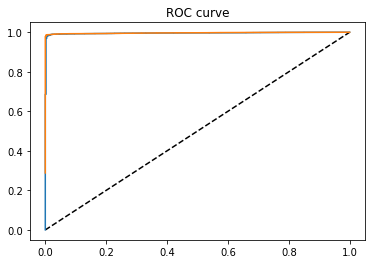

Rnn Accuracy 0.9954800745089185
Cnn Accuracy 0.9967114237600662


In [91]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn)
plt.plot(fpr_cnn, tpr_cnn)
plt.title('ROC curve')
plt.show()

print("Rnn Accuracy", auc_rnn)
print("Cnn Accuracy", auc_cnn)

The AUC scores of both CNN and RNN are similar to each other and extremely close to 1. Thus both model have great performance. 